# Titanic Survival prediction 


In [2]:
# Importing python libraries here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading Training and Testing datasets of titanic.
data_train = pd.read_csv(r'C:\Users\Aniketh Rai\Desktop\AI ML DS\ML\Datasets\titanic\train.csv')
data_test = pd.read_csv(r'C:\Users\Aniketh Rai\Desktop\AI ML DS\ML\Datasets\titanic\test.csv')

print(data_train.head())

y_train = data_train.pop('Survived')
y_testing_data= pd.read_csv(r'C:\Users\Aniketh Rai\Desktop\AI ML DS\ML\Datasets\titanic\gender_submission.csv')
y_test = y_testing_data.pop('Survived')

print(f'y_train : \n {y_train.head()}')
print(f'y_test: \n {y_test.head()}')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
y_

In [4]:
# Lets check for column names, So that we do not mess up while writing 
print(list(data_train.columns))

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
# We do not need Name, Names are useless, it is not like we have superman in passengers who can survive right? So lets drop names
data_train.pop('Name')
print(list(data_train.columns))

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
# checking the description of the Dataframe
data_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# checking for missing values and filling them
data_train.isnull().sum()


PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Filling values
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)  # Use mode()[0] to get the mode value
# Since Cabin has a lot of missing values, let's drop it
data_train.drop(columns=['Cabin'], inplace=True)


C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\4226380376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\4226380376.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [9]:
#Rechecking nulls
data_train.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mean(), inplace=True)
data_test['Embarked'].fillna(data_test['Embarked'].mode()[0], inplace=True)  # Use mode()[0] to get the mode value
# Since Cabin has a lot of missing values, let's drop it
data_test.drop(columns=['Cabin'], inplace=True)
data_test.isnull().sum()

C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\2478885449.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\2478885449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Finding Data Correlations and evaluating using Graphs.

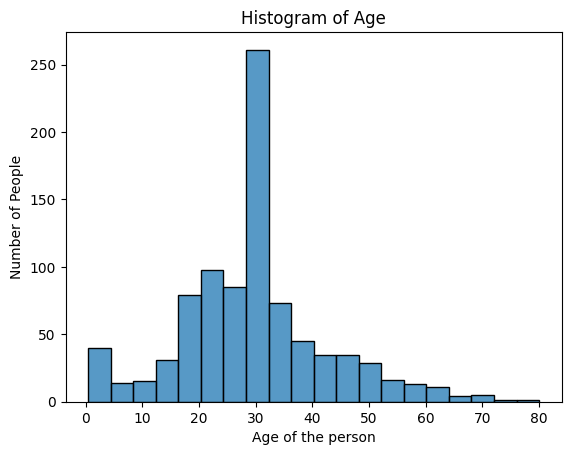

In [12]:
sns.histplot(data = data_train['Age'] , bins = 20).set(xlabel = 'Age of the person' , ylabel = 'Number of People' )
plt.title('Histogram of Age')
plt.show()

C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\1566886633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data_train['Sex'].value_counts() , palette = 'Set1')


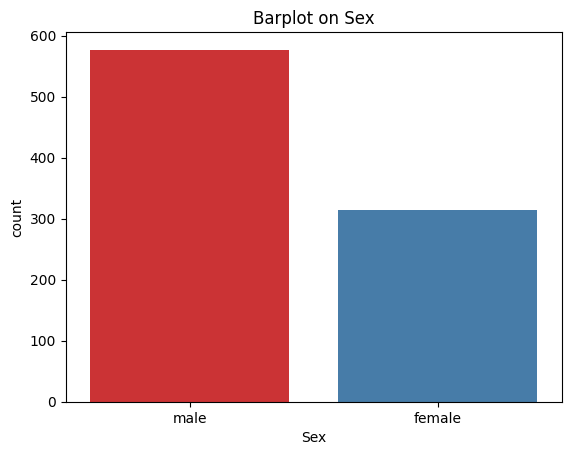

In [13]:
sns.barplot(data = data_train['Sex'].value_counts() , palette = 'Set1')
plt.title('Barplot on Sex')
plt.show()


C:\Users\Aniketh Rai\AppData\Local\Temp\ipykernel_26024\2601443288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = survival_rate_data , palette = 'Set1').set(ylabel = 'Survival %')


Text(0.5, 1.0, 'Survival among the Sex %')

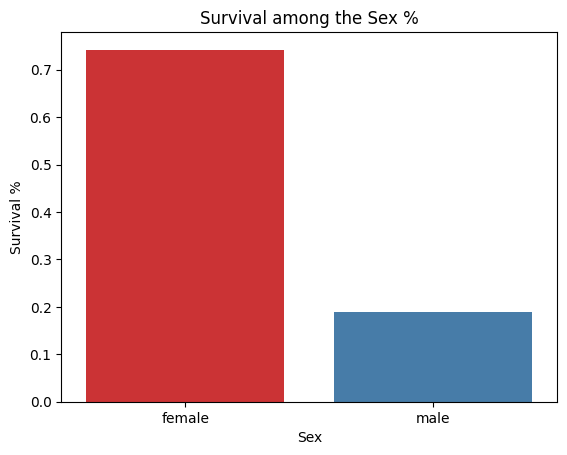

In [14]:
# checking for survival rate in the gender
survival_rate_data = pd.concat([data_train , y_train] , axis =1).groupby('Sex').Survived.mean()
sns.barplot(data = survival_rate_data , palette = 'Set1').set(ylabel = 'Survival %')
plt.title('Survival among the Sex %')

## The Tensorflow Starts here.
Here, We try to find Categorical data and Numerical Data. We convert the Categorical Data to Numerical data.

### What is Categorical data ?
The Categorical data are non-numerical data. 
So, the idea here to find the unique set from the data and try to convert them accordingly. For instance, Column-> Sex is categorical. So, we try to convert it to 0's, 1's for Male and Female. Or it can be vice-versa until the same term is converted with similar value.


In [15]:
#Importing required Libraries for Tensorflow.

from IPython.display import clear_output #This is not a Tensorflow library, but used for clearing output
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

### Explanation for "tf.feature_column.categorical_column_with_vocabulary_list"
tf.feature_column: This is a module in TensorFlow that provides tools for representing feature data for training machine learning models.

categorical_columns_with_vocabulary: This is a function within the feature_column module that creates a categorical feature column based on a predefined vocabulary. This function is typically used when dealing with categorical features that have a fixed set of possible values (like words in a vocabulary).

In [16]:
Categorical_columns = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked']
Numerical_columns = ['PassengerId','Age', 'Fare']

feature_columns = []
for feature in Categorical_columns:
    vocabulary = data_train[feature].unique() #gets list of unique values
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature , vocabulary))
for feature in Numerical_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature , dtype = tf.float32))

print(feature_columns)
    
    

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1

In [17]:
print(data_train)

     PassengerId  Pclass     Sex        Age  SibSp  Parch            Ticket  \
0              1       3    male  22.000000      1      0         A/5 21171   
1              2       1  female  38.000000      1      0          PC 17599   
2              3       3  female  26.000000      0      0  STON/O2. 3101282   
3              4       1  female  35.000000      1      0            113803   
4              5       3    male  35.000000      0      0            373450   
..           ...     ...     ...        ...    ...    ...               ...   
886          887       2    male  27.000000      0      0            211536   
887          888       1  female  19.000000      0      0            112053   
888          889       3  female  29.699118      1      2        W./C. 6607   
889          890       1    male  26.000000      0      0            111369   
890          891       3    male  32.000000      0      0            370376   

        Fare Embarked  
0     7.2500        S  
1  

## It is time to create Training Features and Testing features for our model

In [18]:
def make_input_fn(data_df , label_df , num_epochs = 10, shuffle = True , batch_size = 32):
    def input_function(): #inner_function this will be return 
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df) , label_df)) # creates tf.data.Dataset object with data and its given tensors are sliced along the 1st dimension.
        if shuffle:
            ds = ds.shuffle(1000) #Randomize order of data
        ds =ds.batch(batch_size).repeat(num_epochs) #split datasets into batches of 32 and repeat process for num_epochs
        return ds
    return input_function
train_input_fn = make_input_fn(data_train , y_train)
test_input_fn = make_input_fn(data_test , y_test)

## Creating Model


In [19]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ANIKET~1\\AppData\\Local\\Temp\\tmp3blg3oyt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', 

In [20]:
# training the model
linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)

clear_output()
print(result['accuracy'])

0.6435407


In [22]:
# Testing model prediction probablity
result = list(linear_est.predict(test_input_fn))
print(data_test.loc[4])
print(y_test.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ANIKET~1\AppData\Local\Temp\tmp3blg3oyt\model.ckpt-280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
PassengerId                                             896
Pclass                                                    3
Name           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Sex                                                  female
Age                                                    22.0
SibSp                                                     1
Parch                                                     1
Ticket                                              3101298
Fare                                                12.2875
Embarked                                                  S
Name: 4, dtype: object
1
0.8326674


### Report
AS you can see Mrs. Alexander survived and the model predicted survival % upto 83%.